# Analysis Project: Picogreen Ratio >400/Total vs. User

In [1]:
#Import necessary functions
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

#Makes a white backround with gray horizontal gridmarks at y-values
sns.set_style("whitegrid")

In [2]:
#ps = patch_seq csv file
ps = pd.read_csv("patch_seq_log_mouse.csv")

In [3]:
#list_initial = list with specific columns used from csv file
list_initial = ["Date", "User", "Rig #", "Ratio >400/total", "PCR cycles", "SM_QC_PF", "Bad dates"]
ps = ps[list_initial]
ps.head()

,Date,User,Rig #,Ratio >400/total,PCR cycles,SM_QC_PF,Bad dates
0,170104,P1,5,0.45,18.0,pass,x
1,170104,P1,5,0.9,18.0,pass,x
2,170104,P1,5,0.78,18.0,pass,x
3,170104,P1,5,0.68,18.0,pass,x
4,170104,P1,5,0.7,18.0,pass,x


### Categorizing & Filtering the columns

In [4]:
#Changing Date Format
ps["Date"] = pd.to_datetime(ps["Date"], format = "%y%m%d", errors = "coerce")

#Changing String to Numerical
#ps["Ratio >400/total"] = pd.to_numeric(ps["Ratio >400/total"].str.replace(' ',''), errors ='coerce')

#Categories
ps["User"] = ps["User"].astype("category")
ps["Rig #"] = ps["Rig #"].astype("category")
ps["PCR cycles"] = ps["PCR cycles"].astype("category")
ps["SM_QC_PF"] = ps["SM_QC_PF"].astype("category")
ps["Bad dates"] = ps["Bad dates"].astype("category")

#Filtering Columns
ps = ps[ps["PCR cycles"] == 21]      #Shows 21 pcr cycles
ps = ps[ps["SM_QC_PF"] != "cnt"]     #Shows everything except (cnt = control)
ps = ps[ps["Bad dates"] != "x"]      #Shows everthing except (x = contaminated)

#Dropping blank columns
ps = ps.drop("Bad dates", 1)
ps.dropna(subset = ["User", "Ratio >400/total", "SM_QC_PF"], inplace = True)
#ps.set_index("Date", inplace = True) #Makes Date the index for the dataframe
ps.head()

,Date,User,Rig #,Ratio >400/total,PCR cycles,SM_QC_PF
1634,2017-04-19,P2,6,0.41,21.0,fail
1635,2017-04-19,P2,6,0.54,21.0,pass
1636,2017-04-19,P2,6,1,21.0,fail
1637,2017-04-19,P2,6,0.71,21.0,pass
1638,2017-04-19,P2,6,0.55,21.0,pass


In [5]:
ps.tail()

,Date,User,Rig #,Ratio >400/total,PCR cycles,SM_QC_PF
5034,2018-01-16,PA,7,64%,21.0,pass
5035,2018-01-16,PA,7,47%,21.0,pass
5036,2018-01-16,PA,7,62%,21.0,pass
5037,2018-01-17,P8,4,66%,21.0,pass
5038,2018-01-17,P8,4,35%,21.0,fail


## Info

In [6]:
#split dataframe by index 
#Dataset 1 with decimals(1634 to 3802)        #[:1414]
#Dataset 2 with percentages(3809 t0 5038)     #[1414:]

In [7]:
ps1 = ps.iloc[:1414]
ps2 = ps.iloc[1414:]

#Changing String to Numerical
ps1["Ratio >400/total"] = pd.to_numeric(ps["Ratio >400/total"].str.replace(' ',''), errors ='coerce')
#Got this method from stack overflow(I understand most of if except what rstrip does)
ps2["Ratio >400/total"] = ps2["Ratio >400/total"].str.rstrip('%').astype("float") / 100.0

C:\Users\ramr\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\ramr\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [8]:
ps1.head()

,Date,User,Rig #,Ratio >400/total,PCR cycles,SM_QC_PF
1634,2017-04-19,P2,6,0.41,21.0,fail
1635,2017-04-19,P2,6,0.54,21.0,pass
1636,2017-04-19,P2,6,1.00,21.0,fail
1637,2017-04-19,P2,6,0.71,21.0,pass
1638,2017-04-19,P2,6,0.55,21.0,pass


In [9]:
ps1.tail()

,Date,User,Rig #,Ratio >400/total,PCR cycles,SM_QC_PF
3798,2017-09-01,P8,6,0.28,21.0,pass
3799,2017-09-01,P8,6,0.71,21.0,pass
3800,2017-09-01,P8,6,0.34,21.0,pass
3801,2017-09-01,P8,6,0.37,21.0,pass
3802,2017-09-01,P8,6,0.44,21.0,pass


In [10]:
ps2.head()

,Date,User,Rig #,Ratio >400/total,PCR cycles,SM_QC_PF
3809,2017-09-06,P2,7,0.63,21.0,pass
3810,2017-09-06,P2,7,0.73,21.0,pass
3811,2017-09-08,P2,7,0.71,21.0,pass
3812,2017-09-08,P2,7,0.62,21.0,pass
3813,2017-09-08,P9,7,0.35,21.0,fail


In [11]:
ps2.tail()

,Date,User,Rig #,Ratio >400/total,PCR cycles,SM_QC_PF
5034,2018-01-16,PA,7,0.64,21.0,pass
5035,2018-01-16,PA,7,0.47,21.0,pass
5036,2018-01-16,PA,7,0.62,21.0,pass
5037,2018-01-17,P8,4,0.66,21.0,pass
5038,2018-01-17,P8,4,0.35,21.0,fail


In [12]:
ps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2595 entries, 1634 to 5038
Data columns (total 6 columns):
Date                2595 non-null datetime64[ns]
User                2595 non-null category
Rig #               2583 non-null category
Ratio >400/total    2595 non-null object
PCR cycles          2595 non-null category
SM_QC_PF            2595 non-null category
dtypes: category(4), datetime64[ns](1), object(1)
memory usage: 152.0+ KB


In [13]:
ps.User.value_counts()

P2     668
P8     655
P1     547
P9     284
PB     181
PA     137
P6     110
P5      13
P6       0
P3       0
P0       0
Name: User, dtype: int64

## Plots

In [14]:
#Users = P1(Kristen), P2(Rusty), P8(Lindsay), P9(Lisa), PA(Ram), PB(Dijon)
#Data1: 4/19/2017 - 9/01/2017 
#Data2: 9/06/2017 - 1/17/2018 
#Overall Data: 4/19/2017 - 1/17/2018 

Issue for plotting, values for ratio are displayed differently such as 33% or 0.33. From date 9/06/17 and later they were displayed as percentage and not ratios. P1,P2,P8 have data from 4/19 to 9/06/17 in ratios then everyone's results are in percentages

### PS1: Only dataset with demicals NOT percentages

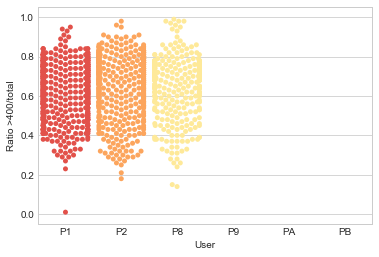

In [15]:
sp = sns.swarmplot(x = "User", y = "Ratio >400/total", data = ps1[ps1["Ratio >400/total"] < 1], 
                    order = ["P1", "P2", "P8", "P9", "PA", "PB"], palette = "Spectral")

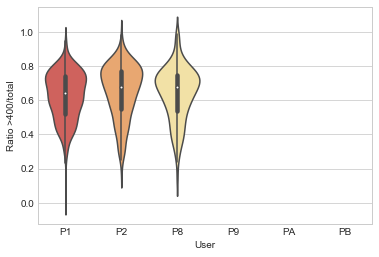

In [16]:
vp = sns.violinplot(x = "User", y = "Ratio >400/total", data = ps1[ps1["Ratio >400/total"] < 1], 
                    order = ["P1", "P2", "P8", "P9", "PA", "PB"], palette = "Spectral")

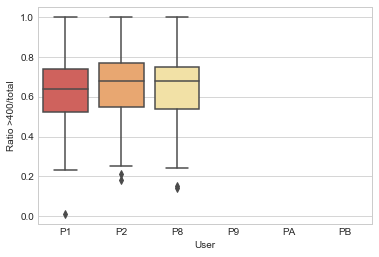

In [17]:
np = sns.boxplot(x = "User", y = "Ratio >400/total", data = ps1[ps1["Ratio >400/total"] <= 1], 
                    order = ["P1", "P2", "P8", "P9", "PA", "PB"], palette = "Spectral")

### PS2: Only dataset with percentages

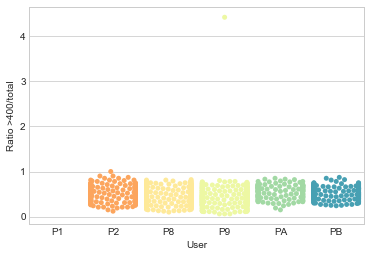

In [18]:
sp = sns.swarmplot(x = "User", y = "Ratio >400/total", data = ps2[ps2["Ratio >400/total"] <= 100], 
                    order = ["P1", "P2", "P8", "P9", "PA", "PB"], palette = "Spectral")

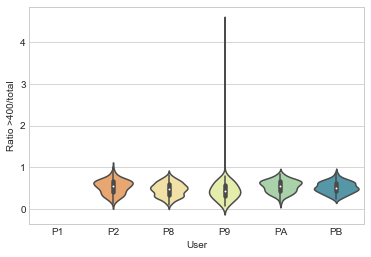

In [19]:
vp = sns.violinplot(x = "User", y = "Ratio >400/total", data = ps2[ps2["Ratio >400/total"] <= 100], 
                    order = ["P1", "P2", "P8", "P9", "PA", "PB"], palette = "Spectral")

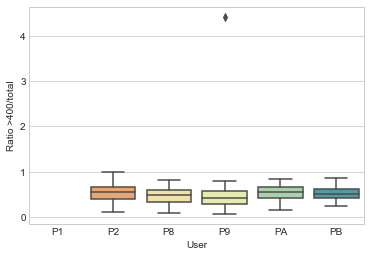

In [20]:
bp = sns.boxplot(x = "User", y = "Ratio >400/total", data = ps2[ps2["Ratio >400/total"] <= 100], 
                    order = ["P1", "P2", "P8", "P9", "PA", "PB"], palette = "Spectral")

## Plots with ps1 & ps2 concat

In [21]:
#concatenating two datasets into one 
ps3 = pd.concat([ps1,ps2])

In [22]:
ps3.head()

,Date,User,Rig #,Ratio >400/total,PCR cycles,SM_QC_PF
1634,2017-04-19,P2,6,0.41,21.0,fail
1635,2017-04-19,P2,6,0.54,21.0,pass
1636,2017-04-19,P2,6,1.00,21.0,fail
1637,2017-04-19,P2,6,0.71,21.0,pass
1638,2017-04-19,P2,6,0.55,21.0,pass


In [23]:
ps3.tail()

,Date,User,Rig #,Ratio >400/total,PCR cycles,SM_QC_PF
5034,2018-01-16,PA,7,0.64,21.0,pass
5035,2018-01-16,PA,7,0.47,21.0,pass
5036,2018-01-16,PA,7,0.62,21.0,pass
5037,2018-01-17,P8,4,0.66,21.0,pass
5038,2018-01-17,P8,4,0.35,21.0,fail


## Swarmplot, Violinplot & Boxplot of Picogreen Ratio >400/Total vs User

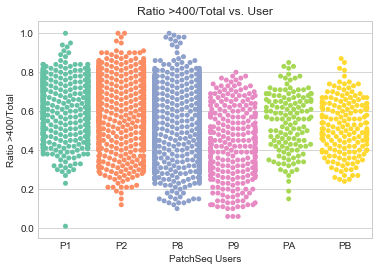

In [24]:
sp = sns.swarmplot(x = "User", y = "Ratio >400/total", data = ps3[ps3["Ratio >400/total"] <= 1], 
                   order = ["P1", "P2", "P8", "P9", "PA", "PB"], 
                   palette = "Set2").set_title("Ratio >400/Total vs. User")
plt.xlabel("PatchSeq Users")
plt.ylabel("Ratio >400/Total") #Redundant ylabel
plt.savefig("swarm_picogreen_ratio_vs_user")

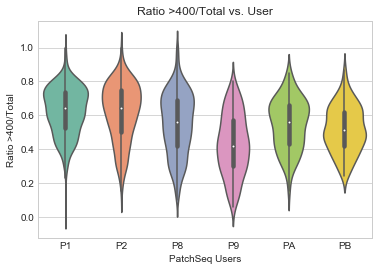

In [25]:
vp = sns.violinplot(x = "User", y = "Ratio >400/total", data = ps3[ps3["Ratio >400/total"] <= 1], 
                    order = ["P1", "P2", "P8", "P9", "PA", "PB"], 
                    palette = "Set2").set_title("Ratio >400/Total vs. User")
plt.xlabel("PatchSeq Users")
plt.ylabel("Ratio >400/Total") #Redundant ylabel
plt.savefig("vio_picogreen_ratio_vs_user")

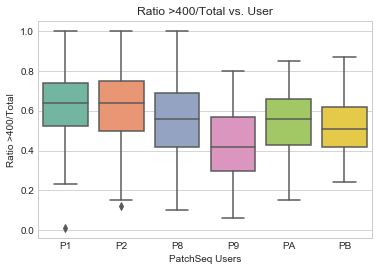

In [26]:
bp = sns.boxplot(x = "User", y = "Ratio >400/total", data = ps3[ps3["Ratio >400/total"] <= 1], 
                 order = ["P1", "P2", "P8", "P9", "PA", "PB"], 
                 palette = "Set2").set_title("Ratio >400/Total vs. User")
plt.xlabel("PatchSeq Users")
plt.ylabel("Ratio >400/Total") #Redundant ylabel
plt.savefig("box_picogreen_ratio_vs_user")

## Extras

In [27]:
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 '_classic_test']

In [28]:
#EXAMPLE
#concat() --> EXAMPLE: pd.concat([list1,list2])
#pd.concat([list1,list2], ignore_index = False)
#ignore_index can show where the second list starts 
#Use this for the ratio vs user program for concat decimals and percentages

#pd.concat([list1,list2], keys = ["List #1", "List #2"])
#keys can be used to title the different lists to see where second list starts